In [2]:
# Import statements
import matplotlib.pyplot as plt
import fastf1
import pandas as pd

In [3]:
# Load in data

session = fastf1.get_session(2024, 'Monaco', 'R')
session.load()


laps_full = session.laps
results_full = session.results

merged_df = pd.merge(laps_full, results_full,
                    on='DriverNumber',  # or whatever column they share
                    how='left')

merged_df.head(10)

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) C:\Users\alfar\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track 

,Time_x,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Position_y,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time_y,Status,Points,Laps
0,0 days 01:36:02.319000,LEC,16,0 days 00:40:56.330000,1.0,1.0,NaT,0 days 00:56:45.433000,NaT,0 days 00:00:46.389000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
1,0 days 01:39:00.140000,LEC,16,NaT,2.0,2.0,0 days 01:36:03.182000,NaT,0 days 00:00:26.854000,0 days 00:00:41.743000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
2,0 days 01:40:24.764000,LEC,16,0 days 00:01:24.624000,3.0,2.0,NaT,NaT,0 days 00:00:24.007000,0 days 00:00:38.235000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
3,0 days 01:41:47.389000,LEC,16,0 days 00:01:22.625000,4.0,2.0,NaT,NaT,0 days 00:00:21.892000,0 days 00:00:38.779000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
4,0 days 01:43:09.184000,LEC,16,0 days 00:01:21.795000,5.0,2.0,NaT,NaT,0 days 00:00:21.314000,0 days 00:00:38.513000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
5,0 days 01:44:30.329000,LEC,16,0 days 00:01:21.145000,6.0,2.0,NaT,NaT,0 days 00:00:21.568000,0 days 00:00:38.168000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
6,0 days 01:45:51.309000,LEC,16,0 days 00:01:20.980000,7.0,2.0,NaT,NaT,0 days 00:00:21.370000,0 days 00:00:38.056000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
7,0 days 01:47:12.339000,LEC,16,0 days 00:01:21.030000,8.0,2.0,NaT,NaT,0 days 00:00:21.250000,0 days 00:00:38.171000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
8,0 days 01:48:32.453000,LEC,16,0 days 00:01:20.114000,9.0,2.0,NaT,NaT,0 days 00:00:21.092000,0 days 00:00:37.612000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0
9,0 days 01:49:53.228000,LEC,16,0 days 00:01:20.775000,10.0,2.0,NaT,NaT,0 days 00:00:21.036000,0 days 00:00:37.886000,...,1.0,1,1.0,NaT,NaT,NaT,0 days 02:23:15.554000,Finished,25.0,78.0


In [6]:
cv_by_driver = merged_df.groupby(['Driver', 'TeamName'])['LapTime'].agg(['mean', 'std'])
cv_by_driver['Driver'] = cv_by_driver['std'] / cv_by_driver['mean']

print(cv_by_driver['Driver'].sort_values(ascending=False))

Driver  TeamName       
HAM     Mercedes           2.495603
VER     Red Bull Racing    2.492226
RUS     Mercedes           2.488457
NOR     McLaren            2.485410
SAI     Ferrari            2.481673
LEC     Ferrari            2.478862
PIA     McLaren            2.478669
BOT     Kick Sauber        2.474515
SAR     Williams           2.468235
ALO     Aston Martin       2.465968
ZHO     Kick Sauber        2.463863
RIC     RB                 2.460232
STR     Aston Martin       2.454971
GAS     Alpine             2.450727
ALB     Williams           2.449674
TSU     RB                 2.447803
HUL     Haas F1 Team            NaN
MAG     Haas F1 Team            NaN
OCO     Alpine                  NaN
PER     Red Bull Racing         NaN
Name: Driver, dtype: float64


## Visualize variation of coefficient

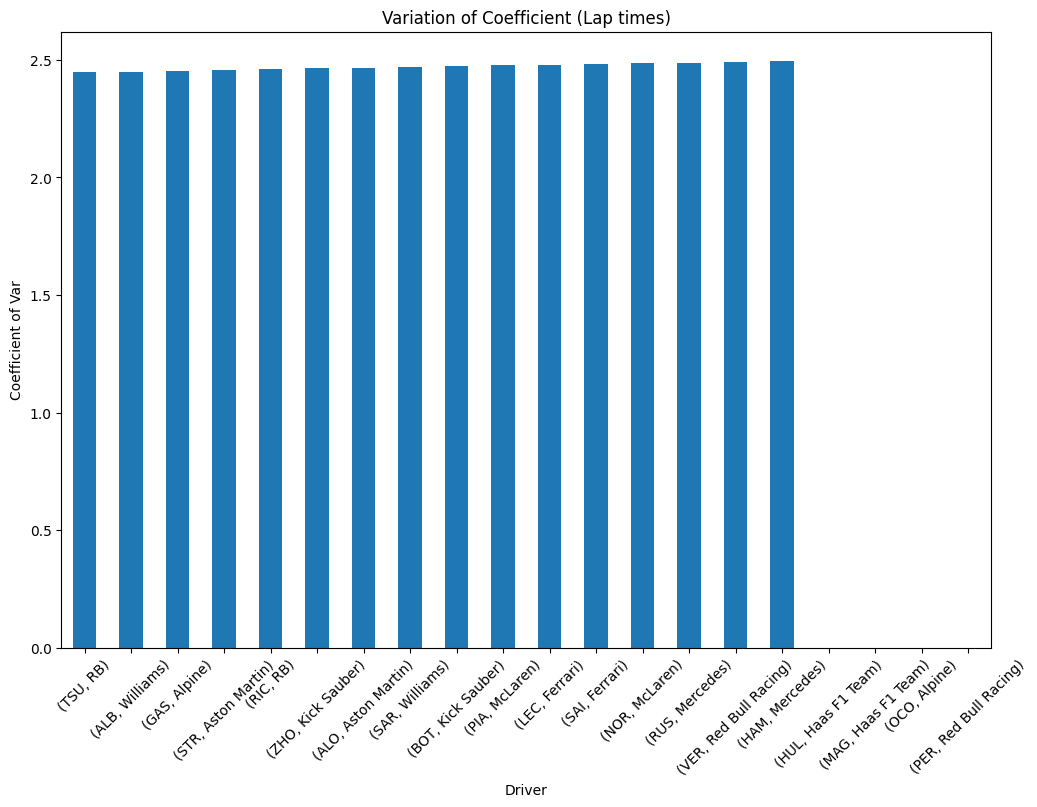

In [18]:
cv_by_driver["Driver"].sort_values().plot(kind='bar', figsize=(12, 8))
plt.xticks(rotation=45)
plt.title('Variation of Coefficient (Lap times)')
plt.xlabel('Driver')
plt.ylabel('Coefficient of Var')
plt.tight_layout
plt.show()